<!--
style="color:blue;font-size:16px;"
-->
<h3>the goal here is to munge the images/masks</h3>
<p style="color:blue;"></p>

In [1]:
import json, sys, random, os, warnings 
from PIL import Image
import pathlib as pl
from air_bus.airbus_utils import rle_decode, rle_encode, save_img, same_id
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy

import IPython.display as display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
import tensorflow.keras.callbacks
#AUTOTUNE = tensorflow.data.experimental.AUTOTUNE

In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
target = "/media/thistle/Passport/Kaggle_Data/airbus/updated_data/MASKS/train/images"
len(os.listdir(target))

15822

In [3]:
#paths
data_location = "/media/robert/Passport/Kaggle_Data/airbus/"
DATA_PATH = pl.Path(data_location)
TRAIN_DATA = os.path.join(DATA_PATH, "train_v2")
TEST_DATA = os.path.join(DATA_PATH, "test_v2")
MASKS_DATA = os.path.join(DATA_PATH, "train_ship_segmentations_v2.csv")

SHAPE = (768, 768)

# new images
NEW_TRAIN = "/media/robert/Passport/Kaggle_Data/airbus/new_train"
NEW_MASKS = "/media/robert/Passport/Kaggle_Data/airbus/new_masks"

In [2]:
import numpy as np
a = list (range(11))
np.random.seed(3)
np.random.shuffle(a)
a

[5, 4, 1, 2, 9, 6, 7, 0, 3, 8, 10]

In [4]:
len(os.listdir(TRAIN_DATA))

192556

In [5]:
MASKS_DATA = os.path.join(DATA_PATH, "train_ship_segmentations_v2.csv")
masks = pd.read_csv(MASKS_DATA)
only_ships = masks.dropna(0)

In [6]:
print(only_ships.shape)
only_ships.head()

(81723, 2)


ImageId                                      EncodedPixels
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...
6  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...

In [7]:
vc = only_ships.ImageId.value_counts()
fifteens = vc.loc[vc == 15].index

<h3>Some Notes</h3>
the shape is too large. the classes are unbalanced
<p></p>

CPU times: user 61.3 ms, sys: 4.87 ms, total: 66.2 ms
Wall time: 483 ms


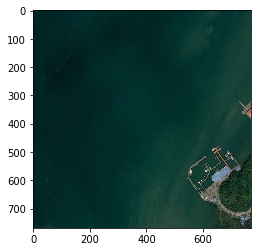

In [12]:
%%time
a_img = fifteens[-48]
#z = same_id(a_img)
#plt.imshow(z, cmap='plasma')
#plt.imshow(z, cmap='yellows')
#new_ = os.path.join(TRAIN_DATA, a_img)
img = Image.open(os.path.join(TRAIN_DATA, a_img))
plt.imshow(img)

In [13]:
%%time
##################  she-bang   ###################### much faster here
######  than above with PIL 4 times- hmmm?
a_img = fifteens[-42]
raw = tensorflow.io.read_file(os.path.join(TRAIN_DATA, a_img))
plt.imshow(tensorflow.image.decode_jpeg(raw))

NameError: name 'tfimg' is not defined

In [23]:
len(os.listdir(NEW_MASKS))

42556

In [18]:
#use map
# use this function in map, loop or list comprehension to perform on all filenames
# in a list. See below.
def add_masks_and_save(filename):
    target_dir = NEW_MASKS
    z = same_id(filename)
    save_img(*z, target_dir)

## now save all the masks that added together
<p>num_files goes down from 192000 to 42000 (approxiamate)</p>

In [59]:
filenames_train = os.listdir(TRAIN_DATA)
len(filenames_train)

192556

In [55]:
filenames = list(vc.index)


In [1]:
data = [(1,3), (2,5), (3,5), (3,6), (4,8)]

In [20]:
t = zip(zip([(1,3), (2,5), (3,5), (3,6), (4,8)]))

In [21]:
list(t)

[(((1, 3),),), (((2, 5),),), (((3, 5),),), (((3, 6),),), (((4, 8),),)]

In [17]:
x, y = 

SyntaxError: can't use starred expression here (<ipython-input-17-cddb0402ec50>, line 4)

In [13]:
x

(1, 2, 3, 3, 4)

In [14]:
tt = zip(data)

In [15]:
list(tt)

[((1, 3),), ((2, 5),), ((3, 5),), ((3, 6),), ((4, 8),)]

In [24]:
q = list(zip(x,y))
q

[(1, 3), (2, 5), (3, 5), (3, 6), (4, 8)]

In [28]:
zi = list(zip(*data))
zi

[(1, 2, 3, 3, 4), (3, 5, 5, 6, 8)]

In [30]:
list(zip(zi))

[((1, 2, 3, 3, 4),), ((3, 5, 5, 6, 8),)]

In [55]:
a = [list(range(i ,i + 10, 2)) for i in range(1,4,1)]

In [56]:
a

[[1, 3, 5, 7, 9], [2, 4, 6, 8, 10], [3, 5, 7, 9, 11]]

In [57]:
list(zip(a))

[([1, 3, 5, 7, 9],), ([2, 4, 6, 8, 10],), ([3, 5, 7, 9, 11],)]

In [66]:
a = list(range(2,6,1))
b = list(range(10,14,1))
c = list(range(22,26,1))
a,b,c

([2, 3, 4, 5], [10, 11, 12, 13], [22, 23, 24, 25])

In [77]:
aa = list(zip(a,b, c))
aa

[(2, 10, 22), (3, 11, 23), (4, 12, 24), (5, 13, 25)]

In [88]:
#x,y,z = list(zip(*aa))
cc = list(zip(*aa))
cc

[(2, 3, 4, 5), (10, 11, 12, 13), (22, 23, 24, 25)]

In [90]:
list(zip(*cc))

[(2, 10, 22), (3, 11, 23), (4, 12, 24), (5, 13, 25)]

In [78]:
def fred(name, num):
    print(f"I kissed {name} {num} times")

In [80]:
turd = ("fred", 3)
fred(*turd)

I kissed fred 3 times


In [82]:
z = zip((2, 10, 22), (3, 11, 23), (4, 12, 24), (5, 13, 25))

In [85]:
list(z)

[(2, 3, 4, 5), (10, 11, 12, 13), (22, 23, 24, 25)]

In [58]:
filenames_masks = list(vc.index)
len(filenames_masks)

42556

In [62]:
len(filenames)

42556

In [61]:
count = 0
for each in filenames_masks:
    if each in filenames_train:
        count+=1
print(f"there were {count} files in filenames_train")

there were 42556 files in filenames_train


In [ ]:
%%time
count=0
for filename in filenames:
    newfile = os.path.join(TRAIN_DATA, filename)
    if os.path.exists(newfile):
        count+=1
print("there were %f photos %d" %count, %count )

In [82]:
z="shit"
print("there were %d photos %s" % (count, z))

there were 42556 photos shit


In [25]:
import multiprocessing
import threading

%%time
pool = multiprocessing.Pool()
result = pool.map(add_masks_and_save, filenames)

In [29]:
TRAIN_DATA

'/media/robert/Passport/Kaggle_Data/airbus/train_v2'

In [30]:
NEW_TRAIN

'/media/robert/Passport/Kaggle_Data/airbus/new_train'

In [100]:
fn = fifteens[8]
copy2(fn, NEW_MASKS, ".")

/media/robert/Passport/Kaggle_Data/airbus/new_masks/74150366c.jpg
./74150366c.jpg


TypeError: integer argument expected, got 'str'

In [103]:
def copy_image(filename):
    shutil.copyfile(os.path.join(TRAIN_DATA, filename), os.path.join(NEW_TRAIN, filename))

##### This is copy the files from one location to another with filenames filtering them from +192000 to +42000


In [186]:
num_files = len(os.listdir(NEW_TRAIN))
num_files

42556

In [183]:
shuffled_indecies = list(np.arange(num_files))

In [248]:
np.random.shuffle(shuffled_indecies)
# calculate nums for train and test sets
num_train = int(num_files*.9)
num_test = num_files - num_train
assert((num_train + num_test) == num_files)
shuffled_indecies[:10]

[20762, 7325, 13055, 34450, 38148, 30646, 32913, 27137, 16134, 41004]

In [255]:
copy_from_dir = "/media/robert/Passport/Kaggle_Data/airbus/new_train"
#save_to_dir = "/home/robert/dev/Pro/ML/airbus/data/practice_delete"
save_to_dir = "/media/robert/Passport/Kaggle_Data/airbus/Images/Test/images"
# num_train = 
list_of_indecies =   shuffled_indecies[num_train:]# using num_trazin

In [316]:
def is_duplicate(needle, haystack):
    """
    @needle- a filename string to search for
    @haystack- a list of filename strings to search in
    returns- boolean
    """
    dups = []
    for name in haystack:
        if name.lower() == needle.lower():
            return True
    return False

def find_duplicates(list_of_files):
    """
    @list_of_files- a python list of filename strings
    finds duplicate files in the list
    returns- a list of the duplicate filename strings, empty list if no duplicates
    """
    dups = []
    while list_of_files:
        a_filename = list_of_files.pop()
        if is_duplicate(a_filename, list_of_files):
            dups.append(a_filename)
    return set(dups)
    

In [317]:
test_string = "cProfile is a profiler included with Python. The profiler gives the total running time, tells the function call frequency and much more data"
test_list_of_strings = test_string.split(" ")
#test_list_of_strings

In [337]:
len(os.listdir("/media/robert/Passport/Kaggle_Data/airbus/Images/Train/images")),len(filenames)

(38303, 42556)

In [342]:
filenames_in_train_images = []
for i in shuffled_indecies[:num_train]:
    filenames_in_train_images.append(filenames[i])

In [334]:
len(filenames_in_train_images),len(os.listdir("/media/robert/Passport/Kaggle_Data/airbus/Images/Test/images"))

(38300, 4256)

In [343]:
len(filenames_in_train_images)

38300

In [360]:
new_files = os.listdir("/media/robert/Passport/Kaggle_Data/airbus/Images/Train/images")
len(new_files)

38303

In [363]:
len(new_files)

38304

In [362]:
new_files.append('fred.txt')

In [369]:
new_files[33980:33990]

['fff909871.jpg',
 'fffcb6464.jpg',
 'fffd924fb.jpg',
 'fffdd2377.jpg',
 'fred.txt',
 'fred2.txt',
 'fred3.txt',
 '30fc11722.jpg',
 '30fece454.jpg',
 '31028bdcd.jpg']

In [356]:
%%time
z = find_duplicates(new_files)

CPU times: user 1min 47s, sys: 0 ns, total: 1min 47s
Wall time: 1min 47s


In [373]:
import cProfile, pstats, io

def profile(fnc):
    """"decorator that uses cProfile to look at a function"""
    def wrapper(*args, **kwargs):
        pr = cProfile.Profile()
        pr.enable()
        retval = fnc(*args, **kwargs)
        pr.disable()
        s = io.StringIO()
        sortby = 'cumulative'
        ps = pstats.Stats(pr,stream=s).sort_stats(sortby)
        ps.print_stats()
        print(s.getvalue())
        return retval
    return wrapper  

In [376]:
def add_string_with_plus(iters):
    s = ""
    for i in range(iters):
        s += "xyz"
    assert len(s) == 3*iters
    return s

In [377]:
add_string_with_plus(10)

'xyzxyzxyzxyzxyzxyzxyzxyzxyzxyz'

In [378]:
"".join(list("abc"))

'abc'

In [379]:
l = list('shit')
l

['s', 'h', 'i', 't']

In [365]:
len(new_files)

38304

In [340]:
len(filenames_in_train_images)

0

In [ ]:
len(filenames_in_train_images)

In [318]:
find_duplicates(test_list_of_strings)

{'profiler', 'the'}

In [319]:
dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [321]:
help(list.index)

Help on method_descriptor:

index(...)
    L.index(value, [start, [stop]]) -> integer -- return first index of value.
    Raises ValueError if the value is not present.



In [309]:
%lsmagic

Available line magics:
%aimport  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autoreload  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%p

In [311]:
%timeit?

Docstring:
Time execution of a Python statement or expression

Usage, in line mode:
  %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
or in cell mode:
  %%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code
  code
  code...

Time execution of a Python statement or expression using the timeit
module.  This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, the statement in the first line is used as setup code
  (executed but not timed) and the body of the cell is timed.  The cell
  body has access to any variables created in the setup code.

Options:
-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
best result.
Default: 7

-t: use time.time to measure the time, which is the default on Unix.
This f

In [310]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [111]:
def copy_image(filename):
    shutil.copyfile(os.path.join(TRAIN_DATA, filename), os.path.join(NEW_TRAIN, filename))

%%time
with concurrent.futures.ThreadPoolExecutor() as executor:
    result = executor.map(copy_image, filenames)
    

In [ ]:
def

In [275]:
copy_from_dir = "/media/robert/Passport/Kaggle_Data/airbus/new_masks"
copy_to_dir = "/media/robert/Passport/Kaggle_Data/airbus/Masks/Test/masks"

def copy_image2(filename):#, copy_from=copy_from_dir, copy_to=save_to_dir):
     # string filename 
    orig_path = os.path.join(copy_from_dir, filename)
    new_path = os.path.join(save_to_dir, filename)
    with open(orig_path, "rb") as reader:
        temp_file = reader.read()
        with open(new_path, "wb") as writer:
            writer.write(temp_file)

In [304]:
%history -l 5

df = pd.DataFrame({"Name":["Ada Lovelace", "Emmy Noether", "Marie Curie", 
                           "Tu Yonath", "Ada Yonath", "Vera Rubin", "Sally Ride"],
                  "Field":["math", "math", "physics", "chemistry", "chemistry", "astronomy", "physics"],
                  "Born":[1816, 1882, 1876, 1930, 1939, 1928, 1951],
                  "Nobel Prize?":["no","no","yes","yes","yes","no","no"]})
import numpy as np
import pandas as pd
import os
from PIL import Image
from functools import reduce
from pprint import pprint as pp
import time
import multiprocessing
df = pd.DataFrame({"Name":["Ada Lovelace", "Emmy Noether", "Marie Curie", 
                           "Tu Yonath", "Ada Yonath", "Vera Rubin", "Sally Ride"],
                  "Field":["math", "math", "physics", "chemistry", "chemistry", "astronomy", "physics"],
                  "Born":[1816, 1882, 1876, 1930, 1939, 1928, 1951],
                  "Nobel Prize?":["no","no","yes","yes","yes","no","no"]})
len(os.listdir('/me

In [2]:
fred = 10

In [3]:
print(fred) is None

10


True

In [4]:
fred

10

In [306]:
print("sue")

sue


In [307]:
fred = 10

In [308]:
%history -l 10


%history -l 5
print(fred) is None
print("sue")
fred = 10
%history -l 10
df = pd.DataFrame({"Name":["Ada Lovelace", "Emmy Noether", "Marie Curie", 
                           "Tu Yonath", "Ada Yonath", "Vera Rubin", "Sally Ride"],
                  "Field":["math", "math", "physics", "chemistry", "chemistry", "astronomy", "physics"],
                  "Born":[1816, 1882, 1876, 1930, 1939, 1928, 1951],
                  "Nobel Prize?":["no","no","yes","yes","yes","no","no"]})
import numpy as np
import pandas as pd
import os
from PIL import Image
from functools import reduce
from pprint import pprint as pp
import time
import multiprocessing
df = pd.DataFrame({"Name":["Ada Lovelace", "Emmy Noether", "Marie Curie", 
                           "Tu Yonath", "Ada Yonath", "Vera Rubin", "Sally Ride"],
                  "Field":["math", "math", "physics", "chemistry", "chemistry", "astronomy", "physics"],
                  "Born":[1816, 1882, 1876, 1930, 1939, 1928, 1951],
                  "Nob

In [276]:
%%time
copy_from_dir = "/media/robert/Passport/Kaggle_Data/airbus/new_masks"
copy_to_dir = "/media/robert/Passport/Kaggle_Data/airbus/Masks/Test/masks"

with concurrent.futures.ThreadPoolExecutor() as executor:
    result = executor.map(copy_image2, filenames_to_copy)
    

CPU times: user 2.66 s, sys: 3.62 s, total: 6.29 s
Wall time: 2min 8s


In [270]:
len(os.listdir(copy_from_dir))

42556

In [274]:
len(os.listdir(copy_to_dir))

4256

4256

In [4]:
len(os.listdir("/media/thistle/Passport/Kaggle_Data/airbus/new_images"))

42556

In [252]:
%%time
# this is moving the training data to final resting spot
for index in list_of_indecies:
    temp_filename = filenames[index] # string filename
    temp_path = os.path.join(copy_from_dir, temp_filename)
    new_filename = os.path.join(save_to_dir, temp_filename)
    with open(temp_path, "rb") as reader:
        temp_file = reader.read()
        with open(new_filename, "wb") as writer:
            writer.write(temp_file)

CPU times: user 14.6 s, sys: 26.9 s, total: 41.5 s
Wall time: 28min 30s


In [254]:
len(os.listdir(save_to_dir))/len(filenames)

0.8999906006203591

In [200]:
i = os.path.join(save_to_dir, "10572a38b.jpg")

In [202]:
im = tensorflow.io.read_file(i)
imm = tensorflow.image.decode_jpeg(im)

In [220]:
z = os.listdir(save_to_dir)
z

['3a5031649.jpg',
 '10572a38b.jpg',
 '.ipynb_checkpoints',
 'd74fb0905.jpg',
 '134499171.jpg',
 '2f8be74f6.jpg']

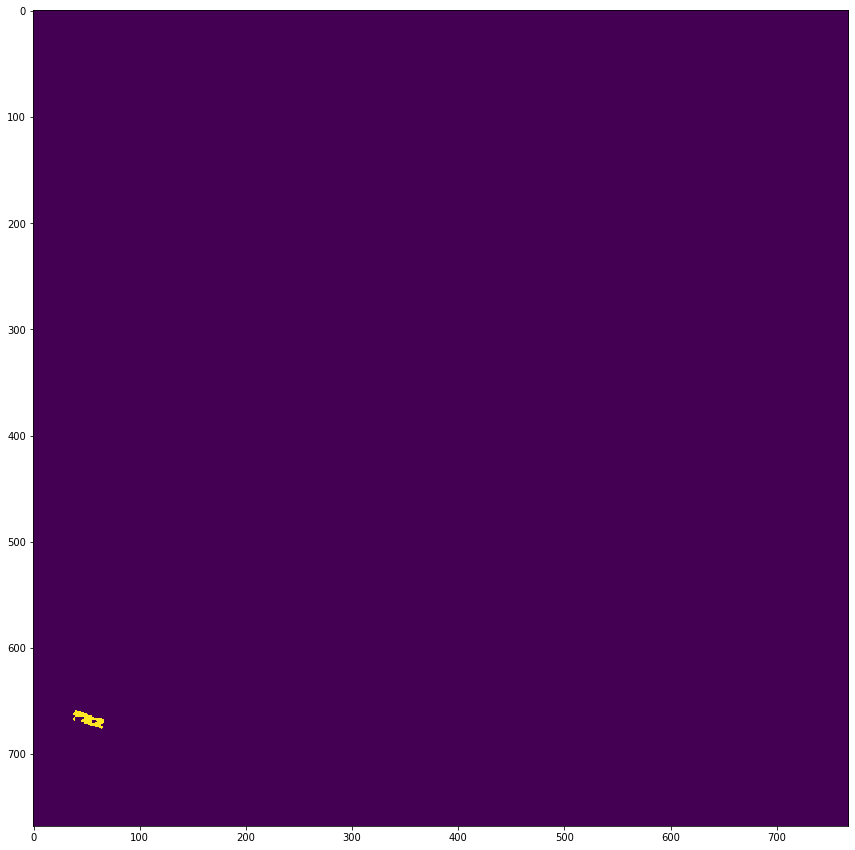

In [234]:
file = z[4]
raw2 = tensorflow.io.read_file(os.path.join(NEW_MASKS, file))
im2 = tensorflow.image.decode_jpeg(raw2)
plt.figure(figsize=(15,15))
plt.imshow(np.squeeze(im2))

In [205]:
arr = imm.numpy()
arr.max(), arr.min()

(220, 0)

3a5031649.jpg
10572a38b.jpg
d74fb0905.jpg
134499171.jpg
2f8be74f6.jpg


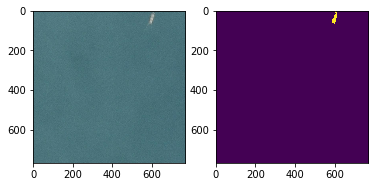

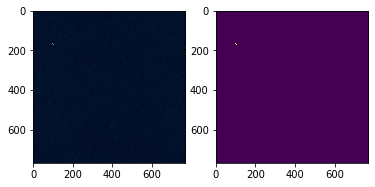

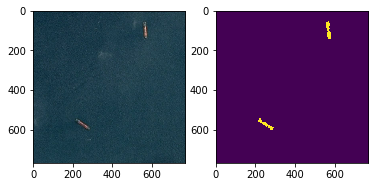

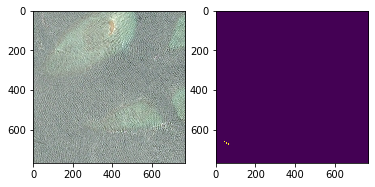

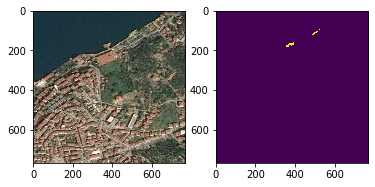

In [232]:
for file in os.listdir(save_to_dir):
    new_path=os.path.join(save_to_dir, file)
    if os.path.isfile(new_path):
        print(file)
        ip = os.path.join(save_to_dir, file)
        raw = tensorflow.io.read_file(new_path)
        im = tensorflow.image.decode_jpeg(raw)
        plt.figure()
        ax = plt.subplot(1,2,1)
        ax.imshow(im)
        ax2 = plt.subplot(1,2,2)
        raw2 = tensorflow.io.read_file(os.path.join(NEW_MASKS, file))
        im2 = tensorflow.image.decode_jpeg(raw2)
        ax2.imshow(np.squeeze(im2))


In [214]:
os.listdir(save_to_dir)

['3a5031649.jpg',
 '10572a38b.jpg',
 '.ipynb_checkpoints',
 'd74fb0905.jpg',
 '134499171.jpg',
 '2f8be74f6.jpg']

In [ ]:
airbus/data/practice_delete/10572a38b.jpg

In [195]:
os.path.exists("/home/robert/dev/Pro/ML/airbus/data/practice_delete")

True

In [158]:
each = fns[6]
mp = os.path.join(NEW_MASKS, each)
ip = os.path.join(NEW_TRAIN, each)

mr = tensorflow.io.read_file(mp)
mi = tensorflow.image.decode_jpeg(mr)

ir = tensorflow.io.read_file(ip)
ii = tensorflow.image.decode_jpeg(ir)

22

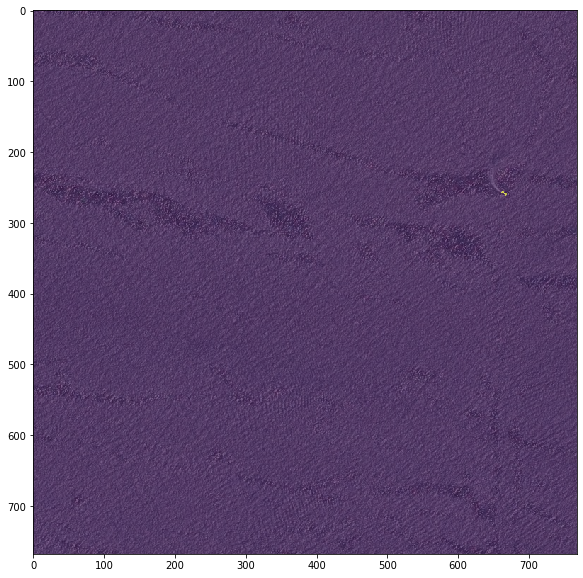

In [159]:
plt.figure(figsize=(10,10))
plt.imshow(ii)
plt.imshow(np.squeeze(mi), alpha=.6)
np.sum(mi) # num pixels are 1 in mask

In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

In [235]:
data_gen = IDG(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [236]:
# airbus/data/practice_delete
os.getcwd()

'/home/robert/dev/Pro/ML/airbus/notebooks'

In [237]:
new_dir = "/home/robert/dev/Pro/ML/airbus/data/practice_delete"
image_gen = data_gen.flow_from_directory(NEW_TRAIN, (256,256), class_mode=None, 
                                    batch_size=10, seed=101, 
                                    save_to_dir=new_dir, save_prefix="fred")

Found 0 images belonging to 0 classes.


In [238]:
z = next(image_gen)

In [244]:
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)
image_datagen = IDG(**data_gen_args)

In [245]:
seed = 101
image_generator = image_datagen.flow_from_directory(
    NEW_TRAIN,
    class_mode=None,
    seed=seed)


Found 0 images belonging to 0 classes.


In [246]:
NEW_TRAIN

'/media/robert/Passport/Kaggle_Data/airbus/new_train'

In [247]:
os.path.isdir(NEW_TRAIN)

True

In [ ]:
download all

In [171]:
os.path.exists("/home/robert/dev/Pro/ML/airbus/data/practice_delete")

True

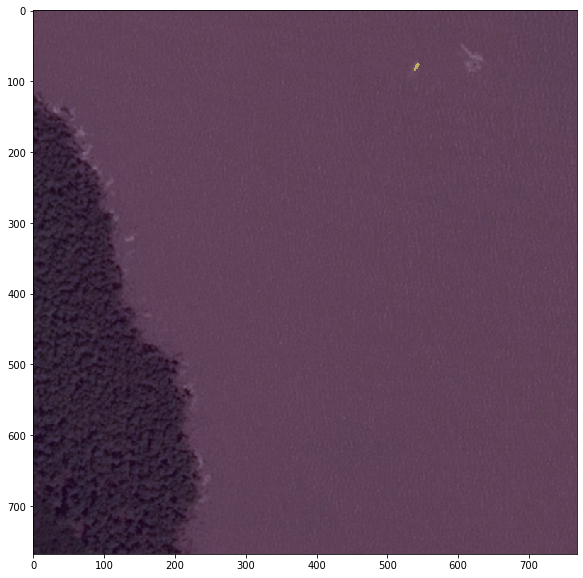

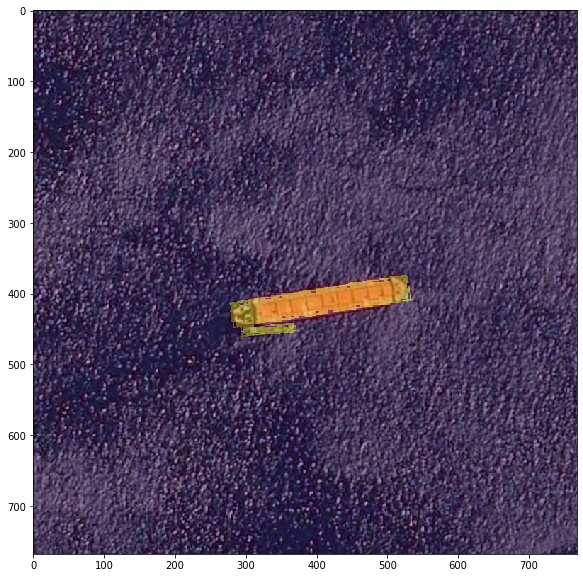

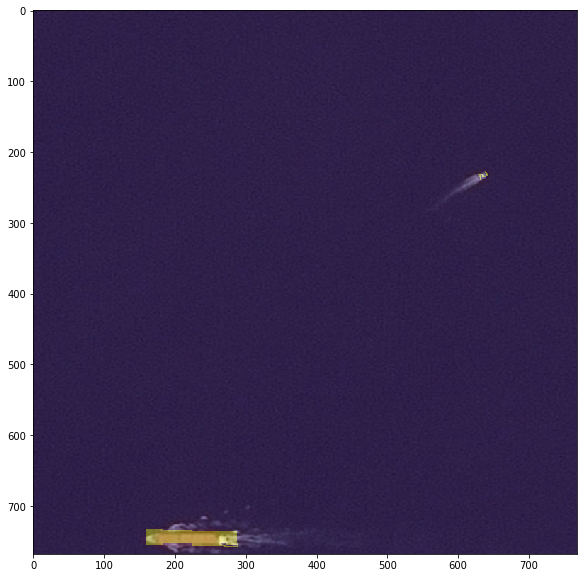

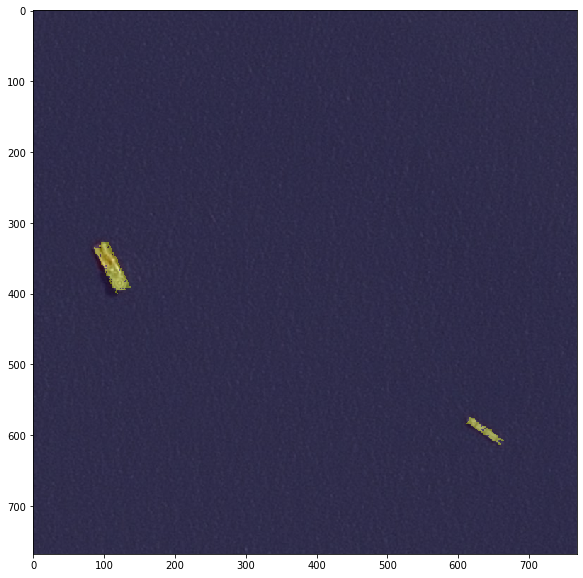

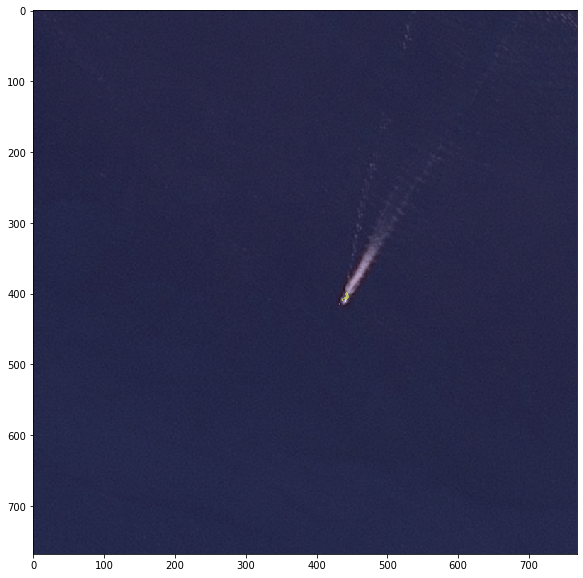

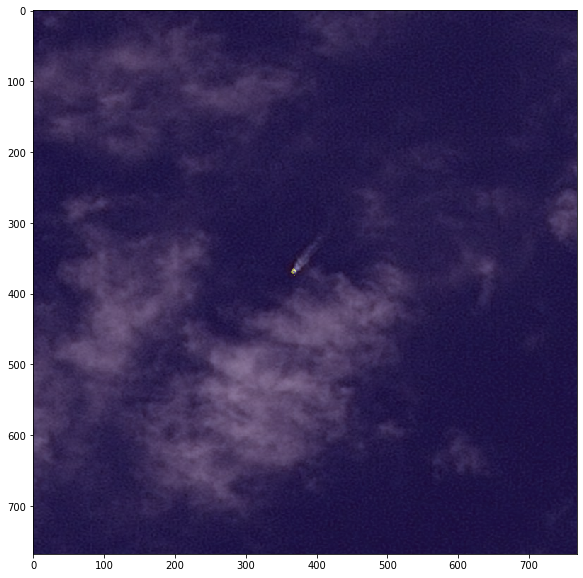

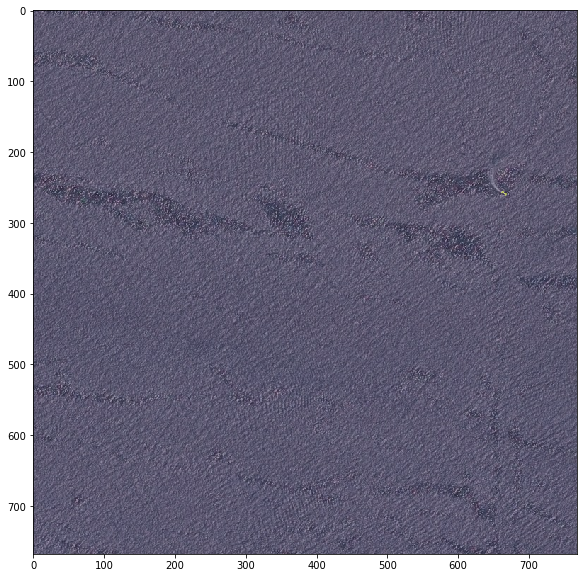

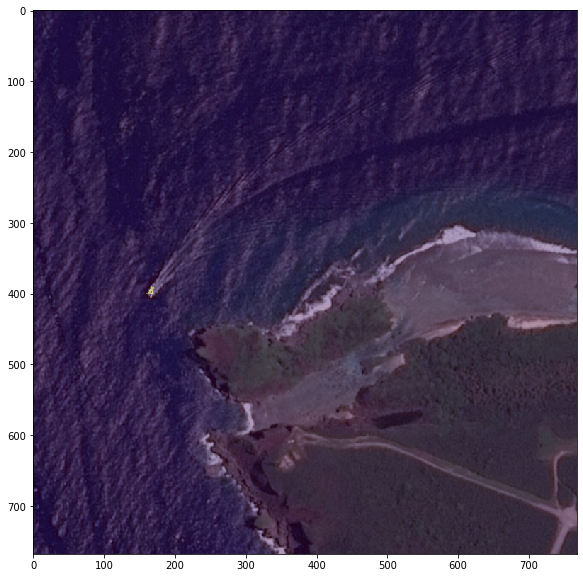

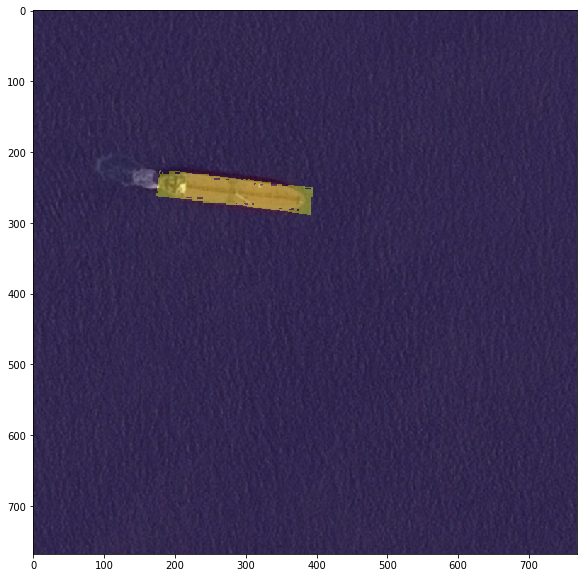

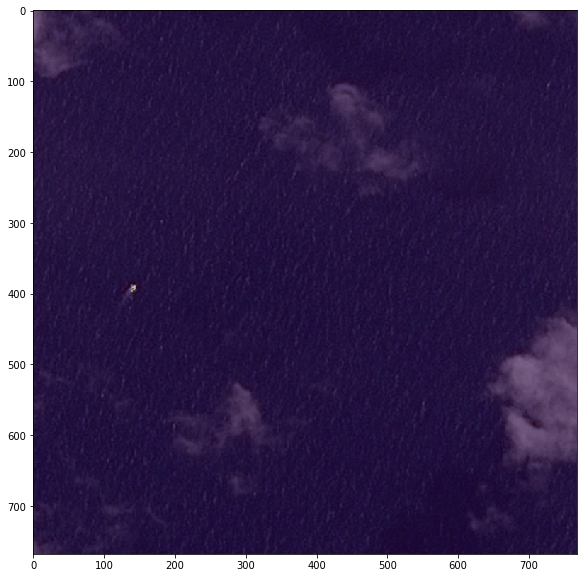

In [155]:
for each in fns:
    mp = os.path.join(NEW_MASKS, each)
    ip = os.path.join(NEW_TRAIN, each)

    mr = tensorflow.io.read_file(mp)
    mi = np.squeeze(tensorflow.image.decode_jpeg(mr))

    ir = tensorflow.io.read_file(ip)
    ii = tensorflow.image.decode_jpeg(ir)
    plt.figure(figsize=(10,10))
    plt.imshow(ii)
    plt.imshow(mi, alpha=.4)
    

In [107]:
import concurrent.futures

### Try this
with open(input_filename,'rb') as ifile:
    with open(output_filename, 'wb') as ofile:
        data = ifile.read(1024*1024)
        while data:
            ofile.write(data)
            data = ifile.read(1024*1024)

In [111]:
def copy_image(filename):
    shutil.copyfile(os.path.join(TRAIN_DATA, filename), os.path.join(NEW_TRAIN, filename))

%%time
with concurrent.futures.ThreadPoolExecutor() as executor:
    result = executor.map(copy_image, filenames)
    

In [28]:
import shutil
for filename in filenames:
    oldpath = os.path(TRAIN_DATA, filename)
    newpath = os.path(NEW_TRAIN, filename)
    shutil.copy(oldpath, newpath)

['Error',
 'ExecError',
 'ReadError',
 'RegistryError',
 'SameFileError',
 'SpecialFileError',
 '_ARCHIVE_FORMATS',
 '_BZ2_SUPPORTED',
 '_LZMA_SUPPORTED',
 '_UNPACK_FORMATS',
 '_ZLIB_SUPPORTED',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_basename',
 '_check_unpack_options',
 '_copyxattr',
 '_destinsrc',
 '_ensure_directory',
 '_find_unpack_format',
 '_get_gid',
 '_get_uid',
 '_make_tarball',
 '_make_zipfile',
 '_ntuple_diskusage',
 '_rmtree_safe_fd',
 '_rmtree_unsafe',
 '_samefile',
 '_unpack_tarfile',
 '_unpack_zipfile',
 '_use_fd_functions',
 'chown',
 'collections',
 'copy',
 'copy2',
 'copyfile',
 'copyfileobj',
 'copymode',
 'copystat',
 'copytree',
 'disk_usage',
 'errno',
 'fnmatch',
 'get_archive_formats',
 'get_terminal_size',
 'get_unpack_formats',
 'getgrnam',
 'getpwnam',
 'ignore_patterns',
 'make_archive',
 'move',
 'os',
 'register_archive_format',
 'register_unpack_format',
 'rmtree',
